In [ ]:
%%capture
!pip install mne
!pip install pytorch-lightning

In [2]:
import sys

assert sys.version_info >= (3, 10)

In [3]:
from packaging.version import Version
import mne

assert Version(mne.__version__) >= Version("1.10.1")

In [ ]:
from pathlib import Path
import importlib

DATASET_DIR = Path("../../0-raw-data/01-motor-imaginery")
EXTRACT_DIR = Path(DATASET_DIR / "data")

def download_and_extract_motor_imaginery_data():
    target_dir = DATASET_DIR.resolve()
    if str(target_dir) not in sys.path:
        sys.path.append(str(target_dir))

    import data_fetcher
    importlib.reload(data_fetcher)

    data_fetcher.download_and_extract_data(delete_zip=False)

download_and_extract_motor_imaginery_data()

[Pipeline] Starting data preparation...
[Download] Skip: BCICIV_2a_gdf.zip already exists
[Extract] Skip: already extracted at /home/kanathipp/Stuffs/Works/final-project-federated-learning/0-raw-data/01-motor-imaginery/data
[Pipeline] Completed.


In [8]:
import mne

# Pick one gdf file to do data analysis
raw = mne.io.read_raw_gdf(Path(EXTRACT_DIR / "A04T.gdf"), eog=['EOG-left', 'EOG-central', 'EOG-right'])
raw.drop_channels(['EOG-left', 'EOG-central', 'EOG-right'])

Extracting EDF parameters from /home/kanathipp/Stuffs/Works/final-project-federated-learning/0-raw-data/01-motor-imaginery/data/A04T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG
Creating raw.info structure...


/home/kanathipp/miniconda3/envs/ml/lib/python3.11/contextlib.py:144: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


<RawGDF | A04T.gdf, 22 x 600915 (2403.7 s), ~22 KiB, data not loaded>

In [9]:
raw.annotations

<Annotations | 610 segments: 1023 (26), 1072 (1), 32766 (7), 768 (288), ...>

In [10]:
events = mne.events_from_annotations(raw)
events[1]

Used Annotations descriptions: [np.str_('1023'), np.str_('1072'), np.str_('32766'), np.str_('768'), np.str_('769'), np.str_('770'), np.str_('771'), np.str_('772')]


{np.str_('1023'): 1,
 np.str_('1072'): 2,
 np.str_('32766'): 3,
 np.str_('768'): 4,
 np.str_('769'): 5,
 np.str_('770'): 6,
 np.str_('771'): 7,
 np.str_('772'): 8}

In [11]:
events[0][0:20]

array([[    0,     0,     3],
       [    0,     0,     2],
       [19905,     0,     3],
       [20255,     0,     4],
       [20755,     0,     8],
       [22258,     0,     4],
       [22758,     0,     8],
       [24176,     0,     4],
       [24676,     0,     5],
       [26128,     0,     4],
       [26628,     0,     8],
       [28136,     0,     4],
       [28636,     0,     5],
       [30247,     0,     4],
       [30747,     0,     5],
       [32164,     0,     4],
       [32664,     0,     8],
       [34214,     0,     4],
       [34714,     0,     8],
       [36145,     0,     4]])

In [12]:
event_dict = {
 'reject':1, #1023
 'eye move':2, #1072
 'new run':3, #32766
 'new trial':4, #768
 'class 1':5, #769
 'class 2':6, #770
 'class 3':7, #771
 'class 4':8, #771
}

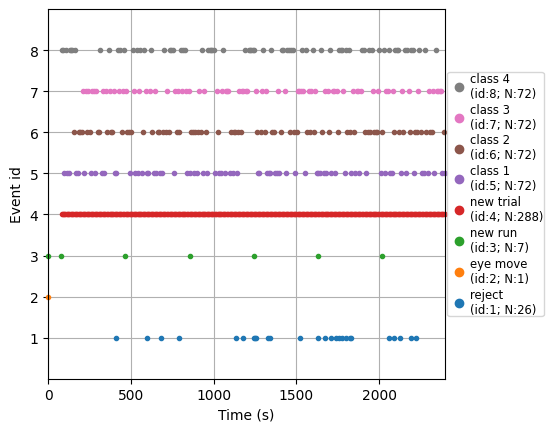

In [13]:
fig = mne.viz.plot_events(events[0], 
                          event_id=event_dict, 
                          sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp
                         )

In [14]:
epochs = mne.Epochs(raw, events[0], event_id=[5, 6, 7, 8], tmin= -0.1, tmax= 0.7, preload=True)

Not setting metadata
288 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 288 events and 201 original time points ...
0 bad epochs dropped


In [15]:
epochs.get_data().shape

(288, 22, 201)

In [16]:
labels = epochs.events
labels

array([[ 20755,      0,      8],
       [ 22758,      0,      8],
       [ 24676,      0,      5],
       [ 26628,      0,      8],
       [ 28636,      0,      5],
       [ 30747,      0,      5],
       [ 32664,      0,      8],
       [ 34714,      0,      8],
       [ 36645,      0,      8],
       [ 38643,      0,      6],
       [ 40549,      0,      8],
       [ 42444,      0,      5],
       [ 44416,      0,      5],
       [ 46360,      0,      6],
       [ 48327,      0,      6],
       [ 50447,      0,      6],
       [ 52455,      0,      7],
       [ 54521,      0,      5],
       [ 56557,      0,      7],
       [ 58623,      0,      6],
       [ 60693,      0,      7],
       [ 62773,      0,      6],
       [ 64685,      0,      5],
       [ 66716,      0,      7],
       [ 68669,      0,      7],
       [ 70630,      0,      5],
       [ 72734,      0,      7],
       [ 74738,      0,      6],
       [ 76713,      0,      6],
       [ 78739,      0,      8],
       [ 8

In [17]:
evoked_1 = epochs['5'].average()
evoked_2 = epochs['6'].average()
evoked_3 = epochs['7'].average()
evoked_4 = epochs['8'].average()

In [ ]:
dicts = {
    'class 1': evoked_1,
    'class 2': evoked_2,
    'class 3': evoked_3,
    'class 4': evoked_4,
}

mne.viz.plot_compare_evokeds(dicts)